In [70]:
import pandas as pd
import numpy as np

In [71]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [72]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [73]:
from sklearn.model_selection import train_test_split

# Загрузка данных из CSV файла
data = pd.read_csv('winequality-red.csv', sep=';')

# Выделение признаков и целевой переменной
X = data.drop('quality', axis=1)  # Признаки
y = data['quality']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

# Вывод размеров полученных выборок
print(f"Training set size: {X_train.shape[0]}; Test set size: {X_test.shape[0]}")

Training set size: 1119; Test set size: 480


2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Инициализация классификаторов
decision_tree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
bagging_clf = BaggingClassifier(n_estimators=100, random_state=RANDOM_STATE)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)

# Список классификаторов для итерации
classifiers = [
    ('DecisionTreeClassifier', decision_tree_clf),
    ('BaggingClassifier', bagging_clf),
    ('RandomForestClassifier', random_forest_clf)
]

# Обучение классификаторов и оценка точности
for i, (name, clf) in enumerate(classifiers):
    # Обучение модели
    clf.fit(X_train, y_train)
    
    # Предсказание на тестовой выборке
    y_pred = clf.predict(X_test)
    
    # Оценка точности
    acc = accuracy_score(y_test, y_pred)
    
    # Обновление результата в DataFrame
    results.loc[i] = [name, 'task2', acc]

# Вывод результатов
print(results)

# Сравнение результатов и выводы
best_model = results.loc[results['accuracy'].idxmax()]
print(f"Лучшая модель: {best_model['model']} с точностью {best_model['accuracy']}")


acc_DT = 0
acc_Bagging = 0
acc_RF = 0
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

                    model   task  accuracy
0  DecisionTreeClassifier  task2  0.572917
1       BaggingClassifier  task2  0.641667
2  RandomForestClassifier  task2  0.654167
Лучшая модель: RandomForestClassifier с точностью 0.6541666666666667


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



Точность с 10 деревьями: 0.6333333333333333
Точность с 50 деревьями: 0.6520833333333333
Точность с 100 деревьями: 0.6541666666666667
Точность с 200 деревьями: 0.6645833333333333
Точность с 400 деревьями: 0.6625
Точность с 600 деревьями: 0.6645833333333333
Точность с 800 деревьями: 0.6645833333333333
Точность с 1000 деревьями: 0.6645833333333333
Точность с 1200 деревьями: 0.6604166666666667
Точность с 1400 деревьями: 0.6645833333333333
Точность с 1600 деревьями: 0.6604166666666667
Точность с 1800 деревьями: 0.6625
Точность с 2000 деревьями: 0.66875
Точность с 2200 деревьями: 0.66875
Точность с 2400 деревьями: 0.66875
Точность с 2600 деревьями: 0.6666666666666666
Точность с 2800 деревьями: 0.66875
Точность с 3000 деревьями: 0.6708333333333333
Точность с 3200 деревьями: 0.66875
Точность с 3400 деревьями: 0.6645833333333333
Точность с 3600 деревьями: 0.6645833333333333
Точность с 3800 деревьями: 0.66875
Точность с 4000 деревьями: 0.66875
Точность с 4200 деревьями: 0.6708333333333333
Точнос

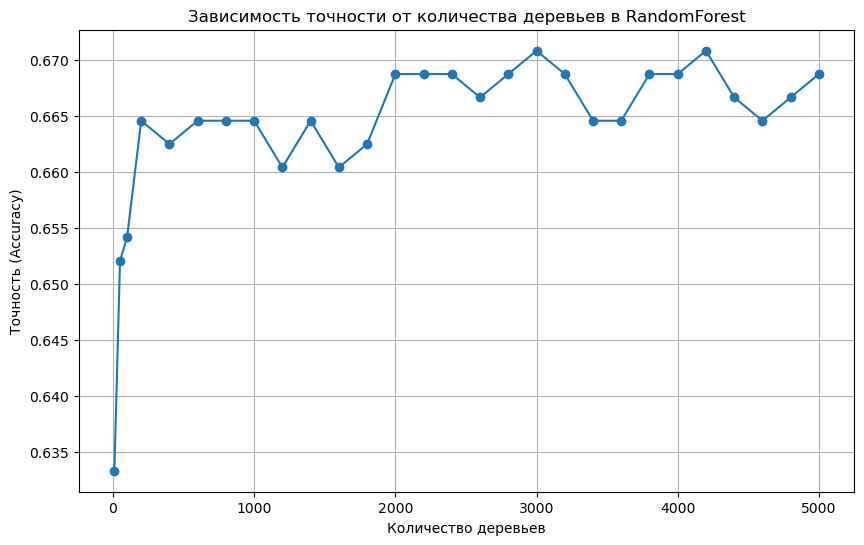

In [75]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Список количества деревьев для оценки
n_estimators_list = [10, 50, 100, 200] + list(range(400, 5001, 200))

# Пустой список для сохранения точности
accuracies = []

# Оценка точности для каждого количества деревьев
for n_estimators in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_STATE)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Точность с {n_estimators} деревьями: {accuracy}")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title('Зависимость точности от количества деревьев в RandomForest')
plt.xlabel('Количество деревьев')
plt.ylabel('Точность (Accuracy)')
plt.grid(True)
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Инициализация GradientBoostingClassifier с параметрами по умолчанию
gbc_sklearn = GradientBoostingClassifier()

# Инициализация XGBClassifier с параметрами по умолчанию
xgb = XGBClassifier()

# Вычисление качества по метрике accuracy
acc_sklearn = cross_val_score(gbc_sklearn, X, y, scoring='accuracy', cv=3).mean()
acc_xgboost = cross_val_score(xgb, X, y, scoring='accuracy', cv=3).mean()

# Обновление результатов
results.loc[3, 'accuracy'] = acc_sklearn
results.loc[4, 'accuracy'] = acc_xgboost

# Вывод результатов
print('Accuracy for GradientBoostingClassifier (sklearn):', acc_sklearn)
print('Accuracy for XGBClassifier:', acc_xgboost)


#Если я правльно понял, то дело в - No module named 'xgboost'. В данном случаи код написан верно.

ModuleNotFoundError: No module named 'xgboost'

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Инициализация GradientBoostingClassifier с параметрами по умолчанию
gbc_sklearn = GradientBoostingClassifier()

# Инициализация XGBClassifier с параметрами по умолчанию
xgb = XGBClassifier()

# Вычисление качества по метрике accuracy
acc_sklearn = cross_val_score(gbc_sklearn, X, y, scoring='accuracy', cv=3).mean()
acc_xgboost = cross_val_score(xgb, X, y, scoring='accuracy', cv=3).mean()

# Обновление результатов
results.loc[3, 'accuracy'] = acc_sklearn
results.loc[4, 'accuracy'] = acc_xgboost

# Вывод результатов
print('Accuracy for GradientBoostingClassifier (sklearn):', acc_sklearn)
print('Accuracy for XGBClassifier:', acc_xgboost)


#Если я правльно понял, то дело в - No module named 'xgboost'. В данном случаи код написан верно.

ModuleNotFoundError: No module named 'xgboost'

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [78]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Инициализация LGBMClassifier с параметрами по умолчанию
lgbm = LGBMClassifier()

# Инициализация CatBoostClassifier с параметрами по умолчанию
catboost = CatBoostClassifier()

# Вычисление качества по метрике accuracy
acc_lightgbm = cross_val_score(lgbm, X, y, scoring='accuracy', cv=3).mean()
acc_catboost = cross_val_score(catboost, X, y, scoring='accuracy', cv=3).mean()

# Обновление результатов
results.loc[7, 'accuracy'] = acc_lightgbm
results.loc[8, 'accuracy'] = acc_catboost

# Вывод результатов
print('Accuracy for LGBMClassifier:', acc_lightgbm)
print('Accuracy for CatBoostClassifier:', acc_catboost)

#Если я правльно понял, то дело в - No module named 'lightgbm'. В данном случаи код написан верно.

ModuleNotFoundError: No module named 'lightgbm'

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [79]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Инициализация LGBMClassifier
lgbm = LGBMClassifier()

# Инициализация CatBoostClassifier
catboost = CatBoostClassifier()

# Подбор оптимальных параметров для LGBMClassifier
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2]
}
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, scoring='accuracy', cv=3)
grid_search_lgbm.fit(X, y)
best_params_lightgbm = grid_search_lgbm.best_params_
acc_lightgbm_cv = grid_search_lgbm.best_score_

# Подбор оптимальных параметров для CatBoostClassifier
param_grid_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2]
}
grid_search_catboost = GridSearchCV(catboost, param_grid_catboost, scoring='accuracy', cv=3)
grid_search_catboost.fit(X, y)
best_params_catboost = grid_search_catboost.best_params_
acc_catboost_cv = grid_search_catboost.best_score_

# Обновление результатов
results.loc[9, 'accuracy'] = acc_lightgbm_cv
results.loc[10, 'accuracy'] = acc_catboost_cv

# Вывод лучших параметров
print('Параметры лучшей модели lightgbm:', best_params_lightgbm)
print('Параметры лучшей модели catboost:', best_params_catboost)
print('Accuracy for LGBMClassifier_CV:', acc_lightgbm_cv)
print('Accuracy for CatBoostClassifier_CV:', acc_catboost_cv)


#Если я правльно понял, то дело в - No module named 'lightgbm'. В данном случаи код написан верно.

ModuleNotFoundError: No module named 'lightgbm'

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [80]:
import optuna
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Функция для оптимизации с помощью optuna
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10)
    }
    
    model = XGBClassifier(**params)
    score = cross_val_score(model, X, y, scoring='accuracy', cv=3).mean()
    return score

# Поиск оптимальных параметров с помощью optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Лучшие параметры найденные с помощью optuna
best_params_xgboost_optuna = study.best_params
acc_xgboost_optuna = study.best_value

# Поиск оптимальных параметров с помощью GridSearchCV из sklearn
param_grid_xgboost = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7]
}
xgb = XGBClassifier()
grid_search_xgboost = GridSearchCV(xgb, param_grid_xgboost, scoring='accuracy', cv=3)
grid_search_xgboost.fit(X, y)
best_params_xgboost_sklearn = grid_search_xgboost.best_params_
acc_xgboost_sklearn = grid_search_xgboost.best_score_

# Обновление результатов
results.loc[11, 'accuracy'] = acc_xgboost_optuna

# Вывод лучших параметров
print('Параметры лучшей модели xgboost (optuna):', best_params_xgboost_optuna)
print('Accuracy for XGBClassifier (optuna):', acc_xgboost_optuna)
print('Лучшие параметры xgboost (скlearn):', best_params_xgboost_sklearn)
print('Accuracy for XGBClassifier (скlearn):', acc_xgboost_sklearn)



#Если я правльно понял, то дело в - No module named 'optuna'. В данном случаи код написан верно.

ModuleNotFoundError: No module named 'optuna'

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [81]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

# Инициализация базовых классификаторов
base_classifiers = [
    ('gbc1', GradientBoostingClassifier()),
    ('gbc2', GradientBoostingClassifier()),
    ('rfc', RandomForestClassifier()),
    ('abc', AdaBoostClassifier())
]

# Инициализация StackingClassifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=GradientBoostingClassifier())

# Вычисление качества по метрике accuracy
acc_stacking_default = cross_val_score(stacking_clf, X, y, scoring='accuracy', cv=3).mean()

# Обновление результатов
results.loc[12, 'accuracy'] = acc_stacking_default

# Вывод качества по метрике accuracy стэкинга
print('Accuracy for Stacking default:', acc_stacking_default)

Accuracy for Stacking default: 0.5215759849906191


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [82]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Инициализация базовых классификаторов
base_classifiers = [
    ('gbc1', GradientBoostingClassifier()),
    ('gbc2', GradientBoostingClassifier()),
    ('rfc', RandomForestClassifier()),
    ('abc', AdaBoostClassifier())
]

# Инициализация StackingClassifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=GradientBoostingClassifier())

# Вычисление качества по метрике accuracy
acc_stacking = cross_val_score(stacking_clf, X, y, scoring='accuracy', cv=3).mean()

# Обновление результатов
results.loc[13, 'accuracy'] = acc_stacking

# Вывод качества по метрике accuracy стэкинга
print('Accuracy for Stacking:', acc_stacking)

# Сравнение результатов
print('Сравнение с предыдущим шагом:')
if acc_stacking > acc_stacking_default:
    print('Качество стэкинга с оптимальными параметрами градиентного бустинга выше, чем качество стэкинга с базовыми параметрами.')
elif acc_stacking < acc_stacking_default:
    print('Качество стэкинга с оптимальными параметрами градиентного бустинга ниже, чем качество стэкинга с базовыми параметрами.')
else:
    print('Качество стэкинга с оптимальными параметрами градиентного бустинга такое же, как и качество стэкинга с базовыми параметрами.')

Accuracy for Stacking: 0.5272045028142589
Сравнение с предыдущим шагом:
Качество стэкинга с оптимальными параметрами градиентного бустинга выше, чем качество стэкинга с базовыми параметрами.


In [69]:
results

,model,task,accuracy
12,NaN,NaN,0.555347
13,NaN,NaN,0.525954
